In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from time import time
%matplotlib inline

In [3]:
def bsm_call_value(S0, K, T, r, sigma):
    S0 = float(S0)
    d1 = (math.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = (math.log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0) - K * math.exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return value

In [4]:
np.random.seed(20000)
t0 = time()

# Parameters
S0 = 100.;
K = 105.;
T = 1.0;
r = 0.05;
sigma = 0.2
M = 50;
dt = T/M;
I = 250000

# euler scheme is additive in log-space
S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt + sigma * np.math.sqrt(dt) * np.random.standard_normal((M + 1, I)), axis=0))

# take the PV of the mean payoff
C0 = np.exp(-r*T)*np.sum(np.maximum(S[-1]-K,0.))/I

print "Black Scholes analytic formula price  %7.3f" % bsm_call_value(S0, K, T, r, sigma)
print "Monte Carlo price  %7.3f" % C0

Black Scholes analytic formula price    8.021
Monte Carlo price    8.166


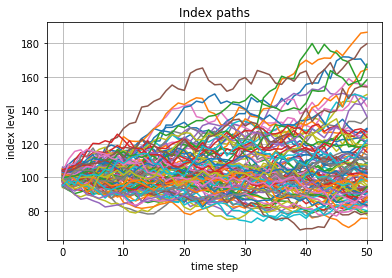

In [5]:
plt.title('Index paths')
plt.plot(S[:, :100])
plt.grid(True)
plt.xlabel('time step')
plt.ylabel('index level')

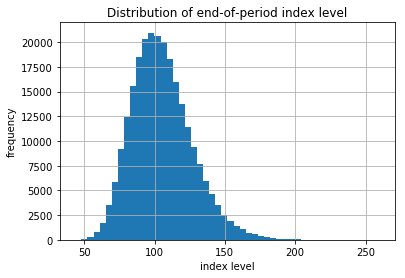

In [26]:
plt.title('Distribution of end-of-period index level')
plt.hist(S[-1], bins=50)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')


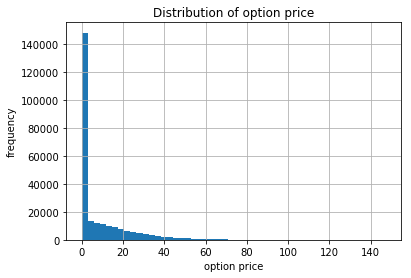

In [31]:
plt.title('Distribution of option price')
plt.hist(np.exp(-r*T)*np.maximum(S[-1]-K,0.), bins=50)
plt.grid(True)
plt.xlabel('option price')
plt.ylabel('frequency')